# <span style="color:rebeccapurple">Python Machine Learning with scikit-learn</span>

## <span style="color:rebeccapurple">Notebook 1: Building a simple model </span>

## <br><span style="color:rebeccapurple">ML workflow steps:</span>

1. State the problem
2. Gather the data
3. Split train-test sets
4. Pre-process the data
5. Establish a baseline
6. Choose a model
7. Train the model
8. Optimize the model
9. Validate the model
10. Predict unknown data points using the model
11. Interpret and evaluate the model

In [3]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [4]:
# setting some figure display paramaters
sns.set_context('notebook')
sns.set_style('white', {'axes.linewidth': 0.5})
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

plt.rcParams['figure.dpi'] = 150
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['legend.edgecolor'] = 'w'

## <span style="color:rebeccapurple">1. State the problem</span></h1>

**Task:** Predict the body mass of penguins.

**Input:** Table of penguins features.

**Output:** A value for body mass in grams.

## <span style="color:rebeccapurple">2. Gather and inspect the data</span></h1>

**Data:** Size measurements for 344 adult foraging Adélie, Chinstrap, and Gentoo penguins observed on islands in the Palmer Archipelago near Palmer Station, Antarctica.

In [73]:
# Let's look at the data
df = pd.read_csv('data/penguins.csv')

In [74]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [75]:
df.shape

(333, 8)

In [76]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [77]:
df.groupby("sex").mean()

/var/folders/j2/63xz860d3_90w9q1rg4066gw0000gp/T/ipykernel_31706/232295409.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("sex").mean()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
sex,,,,,
female,42.096970,16.425455,197.363636,3862.272727,2008.042424
male,45.854762,17.891071,204.505952,4545.684524,2008.041667


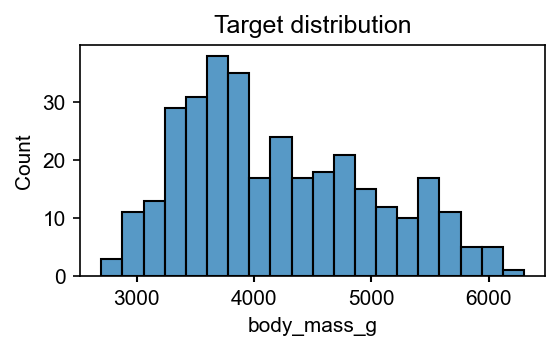

In [78]:
# Let's see what distribution of the output variable looks like
plt.figure(figsize=(4, 2))
sns.histplot(df['body_mass_g'], bins=20)
plt.title('Target distribution')
plt.show()

<span style="color:#DC537D"><font size="+1">What is the input data for prediction?</font></span>

In [173]:
# select the input data
X = 

<span style="color:#DC537D"><font size="+1">What is the target to be predicted?</font></span>

In [174]:
# select the target labels
y = 

## <span style="color:rebeccapurple">3. Split the data into train and test</span></h1>
Ideally you want to separate the train and test sets very early on. I prefer to split them before pre-processing.

<span style="color:#DC537D"><font size="+1">Write code to split the dataset 80-20 train vs test</font></span>

In [119]:
# import the required function


In [124]:
# split the dataset


In [ ]:
# look at the dimensions of the split data


## <span style="color:rebeccapurple">4. Pre-process the training data</span>

<span style="color:#DC537D"><font size="+1">What kind of pre-processing does our dataset need?</font></span>

In [66]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [ ]:
# list the numerical features
numeric_cols = 

In [ ]:
# list the categorical features
categorical_cols = 

In [ ]:
# ---------------- standardize numerical columns ---------------
# import scaler

# fit

# transform both train and test


In [ ]:
# ---------------- encode categorical columns ---------------
# import encoder

# fit

# transform both train and test


In [ ]:
# ---------------- stack the processed columns together---------------


<span style="color:#DC537D"><font size="+1">Does the target label need any encoding / transformation?</font></span>

## <span style="color:rebeccapurple">5. Establish a baseline</span></h1>

The simplest prediction you could make would be an "average diagnosis":

In [79]:
df["body_mass_g"].mean()

4207.057057057057

The error on this prediction can be calculated too. Suppose we decide to calculate the mean squared error (MSE)
$$MSE = \overline{(Observed - Expected)^2}$$

In [80]:
error = df["body_mass_g"] - df["body_mass_g"].mean()
squared_error = error**2
mean_squared_error = np.mean(squared_error)
mean_squared_error

646425.4231709186

The objective of model training or model optimization is to reduce the training error as much as possible, without over-fitting the model.

Note - Ideally you never see the test set, so the "average prediction" would be calculated over the train set only.

<span style="color:#DC537D"><font size="+1">Provide a baseline target prediction and mean squared error using the training set</font></span>

## <span style="color:rebeccapurple">6. Choose a model</span></h1>

<span style="color:#DC537D"><font size="+1">Is this a supervised or unsupervised learning task?</font></span>

<span style="color:#DC537D"><font size="+1">Is this a classification or regression task?</font></span>

<span style="color:#DC537D"><font size="+1">Are we predicting discrete or continuous values?</font></span>

Let's try to use a simple, interpretable model - a linear regressor

## <span style="color:rebeccapurple">7. Train the model</span></h1>

<span style="color:#DC537D"><font size="+1">Use sklearn to train a linear regression model</font></span>

In [ ]:
# import the model class 


In [ ]:
# create an instance of the model object
model = 

In [ ]:
# fit the model to the processed training data
model.

In [ ]:
# get the intercept and model coefficients
model.

In [ ]:
# get the coefficients inside a nice dataframe
feature_names = 

coefs = pd.DataFrame(data=  ,
                     columns= , 
                     index=  )

In [ ]:
# which features look most relevant?
coefs.plot.barh(figsize=(10, 4))
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient values")
plt.subplots_adjust(left=0.3)

## <span style="color:rebeccapurple">10. Predict values for the test set</span></h1>

<span style="color:#DC537D"><font size="+1">Generate predictions from your trained model</font></span>

In [ ]:
# generate predictions from your trained model
y_predicted_train = 
y_predicted_test = 

y_predicted_train.shape, y_predicted_test.shape

In [ ]:
# plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

axes[0].scatter(y_train, y_predicted_train, s=2)
axes[0].set_title("Train data")
axes[1].scatter(y_test, y_predicted_test, s=2)
axes[1].set_title("Test data")

for ax in axes:
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
    ax.set(xlabel="Observed y", ylabel="Predicted y")

## <span style="color:rebeccapurple">11. Evaluate the model</span>

<span style="color:#DC537D"><font size="+1">What is the $R^2$?</font></span>

In [ ]:
# import metric function


In [ ]:
# calculate metric for test


In [ ]:
# calculate metric for train


<span style="color:#DC537D"><font size="+1">What is the MSE?</font></span>

In [ ]:
# import metric function


In [ ]:
# calculate metric for test


In [ ]:
# calculate metric for train


# <span style="color:rebeccapurple">Bonus Questions</span>
Feel free to code out variations of the ML workflow to answer these questions

<span style="color:#DC537D"><font size="+1">Does changing the train-test split ratio improve the model?</font></span>
<br>Hint: does the fraction of the split matter, or does the sample size?

<span style="color:#DC537D"><font size="+1">Do you always get the same result when you randomly split the train and test sets multiple times?</font></span>
<br>Hint: think about the variance in the model

<span style="color:#DC537D"><font size="+1">Are the features and target variables normally distributed?</font></span>
<br>Hint: think about transforming individual features _before_ pre-processing to make it more normal-like

<span style="color:#DC537D"><font size="+1">Does scaling really matter?</font></span>
<br>Hint: don't pre-process the numerical columns before modeling and look at the coefficients